# PCA - Artificial Neural Network
- This notebook will explore different architectures and hyperparameters of the `Artificial Neural Network` looking for an optimal configuration. In this case, the Dataset with a PCA dimensionality reduction will be used.
- All data has been previously processed and normalized in the notebook `data_expl_and_preproc.ipynb`.

## Authors
- Izquierdo Alvarez, Mario
- Giménez López, Antonio
- Nuñez Sánchez, Fernando
- Romero Romero, Martín


## Enviroment configuration
- Firstly, the needed packages along with our custom Modules are loaded. Additionally, a `Random.seed()` is set for reproducibility.

In [1]:
using Random
# Including Modules
push!(LOAD_PATH, "../modules")

#Random seed for reproducibility
seed=42
Random.seed!(seed)

TaskLocalRNG()

In [2]:
using HDF5
using Preprocessing
using ModelSelection
using Plotting
using Sk_Modeling

[ Info: Precompiling Sk_Modeling [top-level]
[ Info: Skipping precompilation since __precompile__(false). Importing Sk_Modeling [top-level].
[ Info: Running `conda install -y -c anaconda conda` in root environment


Solving environment: ...working... done




==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.11.0





## Package Plan ##

  environment location: /home/martin/.julia/conda/3/x86_64

  added / updated specs:
    - conda


The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    conda-forge::ca-certificates-2023.11.~ --> anaconda::ca-certificates-2023.08.22-h06a4308_0 
  certifi            conda-forge/noarch::certifi-2023.11.1~ --> anaconda/linux-64::certifi-2023.11.17-py310h06a4308_0 




Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


[ Info: Running `conda install -y -c conda-forge 'libstdcxx-ng>=3.4,<13.0'` in root environment


Solving environment: ...working... done




==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.11.0





## Package Plan ##

  environment location: /home/martin/.julia/conda/3/x86_64

  added / updated specs:
    - libstdcxx-ng[version='>=3.4,<13.0']


The following packages will be UPDATED:

  ca-certificates    anaconda::ca-certificates-2023.08.22-~ --> conda-forge::ca-certificates-2023.11.17-hbcca054_0 

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            anaconda/linux-64::certifi-2023.11.17~ --> conda-forge/noarch::certifi-2023.11.17-pyhd8ed1ab_0 




Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [3]:
using Flux

## Loading data
- The dataset used in this notebook has been reduced using PCA dimensionality reduction.

In [4]:
file = h5open("pca_data.h5", "r")
train_input = read(file, "train_input")
train_tags = read(file, "train_tags")
test_input = read(file, "test_input")
test_tags = read(file, "test_tags")
close(file)

## 10-Fold Cross-Validation

The cross-validation technique is applied to get the performance estimation of the different models. 

In this process, we have tested several architectures and iteratively we are discarding the worst ones and making slight variations of the best ones, trying to approximate an optimal configuration.

In [5]:
model = :ANN
# Params for cross validation
N = size(train_input, 1)
k = 10

kFoldIndices = crossvalidation(N,k);
best_models_acc = [];

In [6]:

hyperparameters = [
    Dict("architecture" => [32], "activation" => fill(σ, 1), "learning_rate" => 0.01, "validation_ratio" => 0.2, "n_iter_no_change" => 80, "max_iter" => 2000, "repetitionsTraining" => 10, "minLoss" => 0.0),
    Dict("architecture" => [64], "activation" => fill(σ, 1), "learning_rate" => 0.01, "validation_ratio" => 0.2, "n_iter_no_change" => 80, "max_iter" => 2000, "repetitionsTraining" => 10, "minLoss" => 0.0),
    Dict("architecture" => [128], "activation" => fill(σ, 1), "learning_rate" => 0.01, "validation_ratio" => 0.2, "n_iter_no_change" => 80, "max_iter" => 2000, "repetitionsTraining" => 10, "minLoss" => 0.0),
    Dict("architecture" => [32, 32], "activation" => fill(σ, 2), "learning_rate" => 0.01, "validation_ratio" => 0.2, "n_iter_no_change" => 80, "max_iter" => 2000, "repetitionsTraining" => 10, "minLoss" => 0.0),
    Dict("architecture" => [64, 32], "activation" => fill(σ, 2), "learning_rate" => 0.01, "validation_ratio" => 0.2, "n_iter_no_change" => 80, "max_iter" => 2000, "repetitionsTraining" => 10, "minLoss" => 0.0),
    Dict("architecture" => [64, 64], "activation" => fill(σ, 2), "learning_rate" => 0.01, "validation_ratio" => 0.2, "n_iter_no_change" => 80, "max_iter" => 2000, "repetitionsTraining" => 10, "minLoss" => 0.0),
    Dict("architecture" => [128, 64], "activation" => fill(σ, 2), "learning_rate" => 0.01, "validation_ratio" => 0.2, "n_iter_no_change" => 80, "max_iter" => 2000, "repetitionsTraining" => 10, "minLoss" => 0.0),
    Dict("architecture" => [128, 128], "activation" => fill(σ, 2), "learning_rate" => 0.01, "validation_ratio" => 0.2, "n_iter_no_change" => 80, "max_iter" => 2000, "repetitionsTraining" => 10, "minLoss" => 0.0),
# Now with relu same topologies
    Dict("architecture" => [32], "activation" => fill(Flux.relu, 1), "learning_rate" => 0.01, "validation_ratio" => 0.2, "n_iter_no_change" => 80, "max_iter" => 2000, "repetitionsTraining" => 10, "minLoss" => 0.0),
    Dict("architecture" => [64], "activation" => fill(Flux.relu, 1), "learning_rate" => 0.01, "validation_ratio" => 0.2, "n_iter_no_change" => 80, "max_iter" => 2000, "repetitionsTraining" => 10, "minLoss" => 0.0),
    Dict("architecture" => [128], "activation" => fill(Flux.relu, 1), "learning_rate" => 0.01, "validation_ratio" => 0.2, "n_iter_no_change" => 80, "max_iter" => 2000, "repetitionsTraining" => 10, "minLoss" => 0.0),
    Dict("architecture" => [32, 32], "activation" => fill(Flux.relu, 2), "learning_rate" => 0.01, "validation_ratio" => 0.2, "n_iter_no_change" => 80, "max_iter" => 2000, "repetitionsTraining" => 10, "minLoss" => 0.0),
    Dict("architecture" => [64, 32], "activation" => fill(Flux.relu, 2), "learning_rate" => 0.01, "validation_ratio" => 0.2, "n_iter_no_change" => 80, "max_iter" => 2000, "repetitionsTraining" => 10, "minLoss" => 0.0),
    Dict("architecture" => [64, 64], "activation" => fill(Flux.relu, 2), "learning_rate" => 0.01, "validation_ratio" => 0.2, "n_iter_no_change" => 80, "max_iter" => 2000, "repetitionsTraining" => 10, "minLoss" => 0.0),
    Dict("architecture" => [128, 64], "activation" => fill(Flux.relu, 2), "learning_rate" => 0.01, "validation_ratio" => 0.2, "n_iter_no_change" => 80, "max_iter" => 2000, "repetitionsTraining" => 10, "minLoss" => 0.0),
    Dict("architecture" => [128, 128], "activation" => fill(Flux.relu, 2), "learning_rate" => 0.01, "validation_ratio" => 0.2, "n_iter_no_change" => 80, "max_iter" => 2000, "repetitionsTraining" => 10, "minLoss" => 0.0),

]

# Call the function to evaluate the model using different sets of hyperparameters and print the ranking of metrics.
all_metrics = evaluateAndPrintMetricsRanking(model, hyperparameters, train_input, train_tags, kFoldIndices);

# Saving the best acc result of the experiment
best_acc_result = (all_metrics[1][2]["acc"][1],all_metrics[1][2]["acc"][2])
push!(best_models_acc, best_acc_result); # Adding the best result to the list

Training with set of hyperparameters 1
Training with set of hyperparameters 2
Training with set of hyperparameters 3
Training with set of hyperparameters 4
Training with set of hyperparameters 5
Training with set of hyperparameters 6
Training with set of hyperparameters 7
Training with set of hyperparameters 8
Training with set of hyperparameters 9
Training with set of hyperparameters 10
Training with set of hyperparameters 11
Training with set of hyperparameters 12
Training with set of hyperparameters 13
Training with set of hyperparameters 14
Training with set of hyperparameters 15
Training with set of hyperparameters 16

----- acc means -----
Hyperparams set 15 -> 0.977 ± 0.01
Hyperparams set 13 -> 0.973 ± 0.01
Hyperparams set 5 -> 0.972 ± 0.01
Hyperparams set 16 -> 0.971 ± 0.01
Hyperparams set 3 -> 0.971 ± 0.014
Hyperparams set 1 -> 0.971 ± 0.01
Hyperparams set 10 -> 0.97 ± 0.009
Hyperparams set 2 -> 0.969 ± 0.013
Hyperparams set 9 -> 0.969 ± 0.013
Hyperparams set 14 -> 0.969 ± 0.0

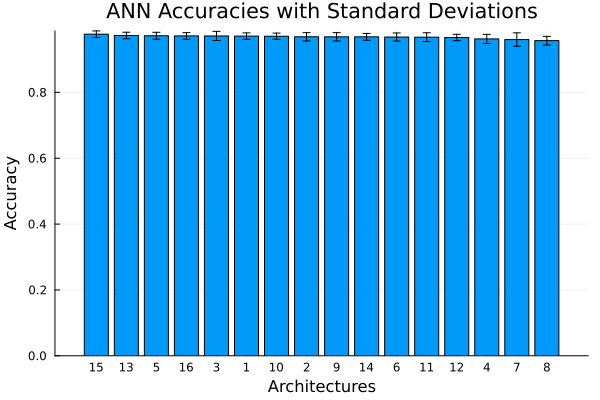

In [7]:
plot_acc_comparison(model, all_metrics)

### Discussion
In this first approach, is noticeable that the last two configurations give the best results in terms of accuracy (the model with "relu" activation).


### Testing all models with "tanh" activation

In [8]:
hyperparameters = [
    Dict("architecture" => [128, 64], "activation" => fill(Flux.relu, 2), "learning_rate" => 0.001, "validation_ratio" => 0.2, "n_iter_no_change" => 20, "max_iter" => 2000, "repetitionsTraining" => 10, "minLoss" => 0.0),
    Dict("architecture" => [128, 64], "activation" => fill(Flux.relu, 2), "learning_rate" => 0.001, "validation_ratio" => 0.2, "n_iter_no_change" => 80, "max_iter" => 2000, "repetitionsTraining" => 10, "minLoss" => 0.0),
    Dict("architecture" => [128, 64], "activation" => fill(Flux.relu, 2), "learning_rate" => 0.01, "validation_ratio" => 0.2, "n_iter_no_change" => 20, "max_iter" => 2000, "repetitionsTraining" => 10, "minLoss" => 0.0),
    Dict("architecture" => [128, 64], "activation" => fill(Flux.relu, 2), "learning_rate" => 0.01, "validation_ratio" => 0.2, "n_iter_no_change" => 80, "max_iter" => 2000, "repetitionsTraining" => 10, "minLoss" => 0.0),
    Dict("architecture" => [128, 64], "activation" => fill(Flux.relu, 2), "learning_rate" => 0.1, "validation_ratio" => 0.2, "n_iter_no_change" => 20, "max_iter" => 2000, "repetitionsTraining" => 10, "minLoss" => 0.0),
    Dict("architecture" => [128, 64], "activation" => fill(Flux.relu, 2), "learning_rate" => 0.1, "validation_ratio" => 0.2, "n_iter_no_change" => 80, "max_iter" => 2000, "repetitionsTraining" => 10, "minLoss" => 0.0),
]
# Call the function to evaluate the model using different sets of hyperparameters and print the ranking of metrics.
all_metrics = evaluateAndPrintMetricsRanking(model, hyperparameters, train_input, train_tags, kFoldIndices);


# Saving the best acc result of the experiment
best_acc_result = (all_metrics[1][2]["acc"][1],all_metrics[1][2]["acc"][2])
push!(best_models_acc, best_acc_result); # Adding the best result to the list

Training with set of hyperparameters 1
Training with set of hyperparameters 2
Training with set of hyperparameters 3
Training with set of hyperparameters 4
Training with set of hyperparameters 5
Training with set of hyperparameters 6

----- acc means -----
Hyperparams set 3 -> 0.973 ± 0.011
Hyperparams set 1 -> 0.972 ± 0.009
Hyperparams set 4 -> 0.972 ± 0.008
Hyperparams set 2 -> 0.971 ± 0.01
Hyperparams set 5 -> 0.95 ± 0.012
Hyperparams set 6 -> 0.947 ± 0.012

----- sensitivity means -----
Hyperparams set 3 -> 0.973 ± 0.011
Hyperparams set 1 -> 0.972 ± 0.009
Hyperparams set 4 -> 0.972 ± 0.008
Hyperparams set 2 -> 0.971 ± 0.01
Hyperparams set 5 -> 0.95 ± 0.012
Hyperparams set 6 -> 0.947 ± 0.012

----- specificity means -----
Hyperparams set 3 -> 0.991 ± 0.004
Hyperparams set 4 -> 0.99 ± 0.003
Hyperparams set 1 -> 0.99 ± 0.003
Hyperparams set 2 -> 0.99 ± 0.003
Hyperparams set 5 -> 0.983 ± 0.004
Hyperparams set 6 -> 0.982 ± 0.004

----- ppv means -----
Hyperparams set 3 -> 0.974 ± 0.011


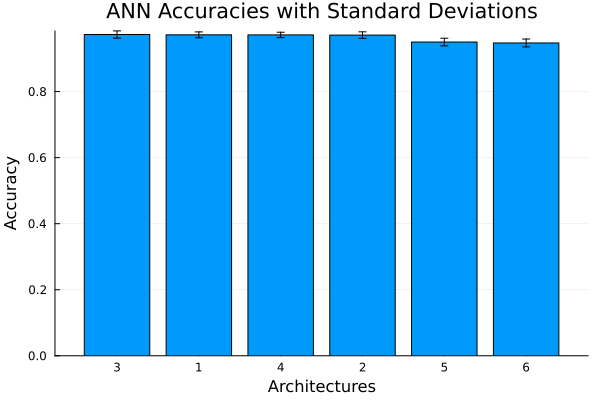

In [11]:
plot_acc_comparison(model, all_metrics)

### Discussion

The models with no_iter_change=80 have the best results. And learning_rate=0.1 performs better than 0.001

## Final discussion

The results obtained in all experiments are quite close, excluding the last experiment with learning_rate=0.001. Nonetheless, the model with a higher accuracy score has been obtained in the first experiment, with the following hyperparameters:

    1. architecture: [128,64]
    2. activation: relu
    3. learning_rate: 0.01
    4. validation_ratio: 0.2
    5. n_iter_no_change: 80
    6. max_iter: 2000
    7. repetitionsTraining: 10


All of this results in an accuracy of **0.977 ± 0.01**.

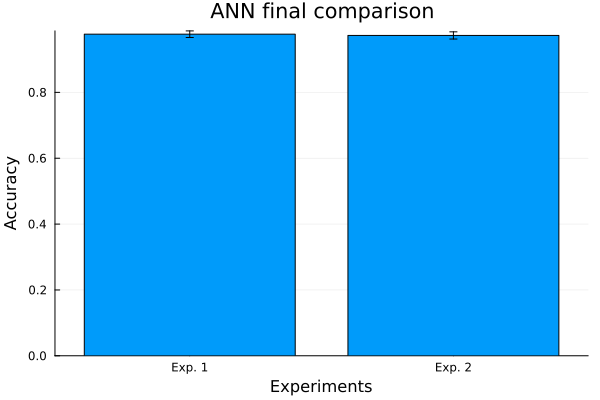

In [12]:
plot_final_comparison("ANN final comparison", best_models_acc)